In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import textblob
from textblob import TextBlob
%matplotlib inline

In [2]:
imdb_raw = pd.read_csv('imdb_labelled.csv')
imdb_raw.columns = ['reviews', 'rating']

In [3]:
positive_words = ['bad', 'not', 'worst', 'low', 'budget',
                'problem', 'nothing', 'too', 'but', 'only', 'negative'
                 , 'boring']

In [4]:
for word in positive_words:
    imdb_raw[str(word)] = imdb_raw.reviews.str.contains(' ' + str(word) + ' ', case=False)

In [5]:
imdb_raw['rating'] = (imdb_raw['rating'] == 1)

scores = []
for review in imdb_raw.reviews:
    scores.append(TextBlob(review).sentiment.polarity)
imdb_raw['scores'] = scores

imdb_raw['scores'] = (imdb_raw['scores'] > 0)

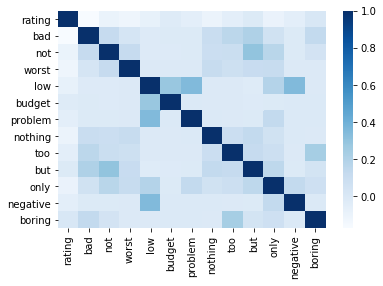

In [6]:
sns.heatmap(imdb_raw.corr(), cmap='Blues')

plt.show()

In [7]:
data = imdb_raw[positive_words]
target = imdb_raw['rating']

In [8]:
from sklearn.naive_bayes import BernoulliNB

In [9]:
bnb = BernoulliNB()

In [10]:
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [11]:
print("Number of mislabeled reviews out of a total {} reviews : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled reviews out of a total 747 reviews : 294
